In [1]:
# Lab 03 — Transform Textual & Image Data into Machine Understandable Format



In [2]:
# In a Jupyter code cell (prefix with !)
!pip install --quiet scikit-learn Pillow numpy pandas matplotlib



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8,5)


In [6]:
## Part A — Bag-of-Words (BoW) on sample documents





In [7]:
# In [1]
documents = [
    "The sun is shining today.",
    "The weather is good, the sun is great.",
    "A sunny day is a wonderful day."
]

print("--- Raw Text Documents ---")
for i, doc in enumerate(documents, 1):
    print(f"Doc {i}: {doc}")


--- Raw Text Documents ---
Doc 1: The sun is shining today.
Doc 2: The weather is good, the sun is great.
Doc 3: A sunny day is a wonderful day.


In [8]:
# In [2]
vectorizer = CountVectorizer()               # default tokenizer, lowercasing, stop-words not removed here
X_text = vectorizer.fit_transform(documents) # fit and transform

feature_names = vectorizer.get_feature_names_out()
text_matrix = X_text.toarray()

print("\n--- Bag-of-Words (BoW) Transformation ---")
print("Vocabulary (Features):", feature_names)
print("Shape of Feature Matrix:", text_matrix.shape)

# show in a neat DataFrame
df_text = pd.DataFrame(text_matrix, columns=feature_names, index=[f"Doc {i}" for i in range(1, len(documents)+1)])
print("\nBoW Numerical Feature Matrix (Machine Understandable Format):")
df_text



--- Bag-of-Words (BoW) Transformation ---
Vocabulary (Features): ['day' 'good' 'great' 'is' 'shining' 'sun' 'sunny' 'the' 'today' 'weather'
 'wonderful']
Shape of Feature Matrix: (3, 11)

BoW Numerical Feature Matrix (Machine Understandable Format):


,day,good,great,is,shining,sun,sunny,the,today,weather,wonderful
Doc 1,0,0,0,1,1,1,0,1,1,0,0
Doc 2,0,1,1,2,0,1,0,2,0,1,0
Doc 3,2,0,0,1,0,0,1,0,0,0,1


In [9]:
## Part B — Image -> Grayscale -> Flatten



In [10]:
# In [3]
import numpy as np
from PIL import Image

# Set path to an image on your computer, or leave None to create a dummy image
image_file_path = None   # e.g., "C:/Users/Ghazi/Pictures/my_photo.jpg"

# Create/load image
if image_file_path and os.path.exists(image_file_path):
    try:
        original_image = Image.open(image_file_path)
        print(f"--- Loaded Image from: {image_file_path} ---")
    except Exception as e:
        print("Error loading image:", e)
        print("Creating dummy image instead.")
        dummy = np.random.randint(0, 256, (100,100,3), dtype=np.uint8)
        original_image = Image.fromarray(dummy, 'RGB')
else:
    print("No valid image path provided. Creating dummy image (100x100 RGB).")
    dummy = np.random.randint(0, 256, (100,100,3), dtype=np.uint8)
    original_image = Image.fromarray(dummy, 'RGB')

# Ensure RGB
original_image = original_image.convert('RGB')
original_array = np.array(original_image)
print(f"Original Image Shape (H, W, C): {original_array.shape}")
print(f"Total pixel features (RGB): {original_array.size}")


No valid image path provided. Creating dummy image (100x100 RGB).
Original Image Shape (H, W, C): (100, 100, 3)
Total pixel features (RGB): 30000


✅ Loaded Image from: C:\Users\Admin\Desktop\2026-bugatti-tourbillon-1-6671bad8bd40f (1).jpg
Original Image Shape (H, W, C): (1363, 2048, 3)
Total Pixel Features (RGB): 8374272


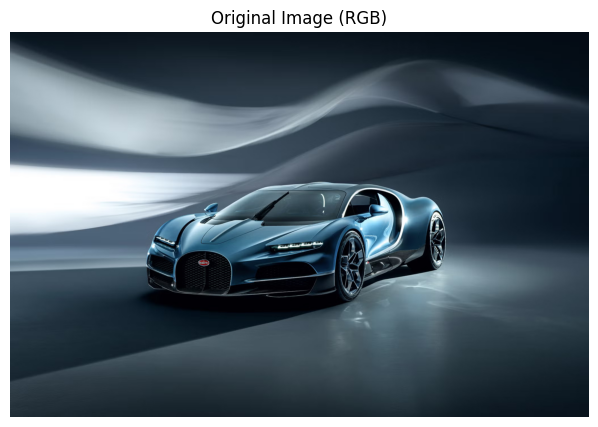

In [12]:
# ✅ Your exact image path
image_file_path = r"C:\Users\Admin\Desktop\2026-bugatti-tourbillon-1-6671bad8bd40f (1).jpg"

# Try loading the image
if image_file_path and os.path.exists(image_file_path):
    original_image = Image.open(image_file_path)
    print(f"✅ Loaded Image from: {image_file_path}")
else:
    print("⚠️ File not found, creating dummy image instead.")
    dummy = np.random.randint(0, 256, (100,100,3), dtype=np.uint8)
    original_image = Image.fromarray(dummy, 'RGB')

# Convert to RGB
original_image = original_image.convert("RGB")
original_array = np.array(original_image)

print(f"Original Image Shape (H, W, C): {original_array.shape}")
print(f"Total Pixel Features (RGB): {original_array.size}")

# Show the original image
plt.imshow(original_image)
plt.title("Original Image (RGB)")
plt.axis("off")
plt.show()



--- Grayscale Conversion ---
Grayscale Shape: (1363, 2048)
Total Pixel Features After Grayscale: 2791424


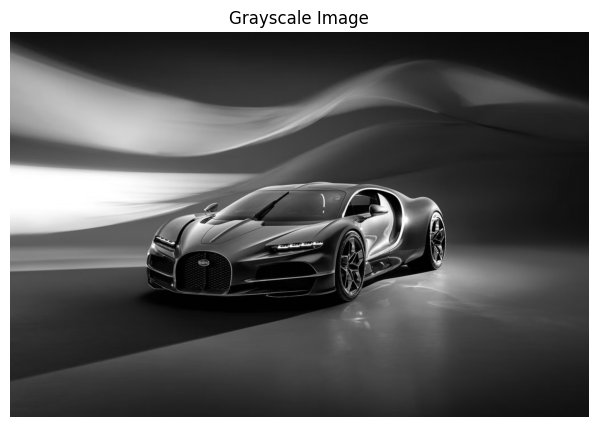

In [13]:
# Convert RGB to grayscale (1 channel)
grayscale_image = original_image.convert("L")
grayscale_array = np.array(grayscale_image)

print("\n--- Grayscale Conversion ---")
print(f"Grayscale Shape: {grayscale_array.shape}")
print(f"Total Pixel Features After Grayscale: {grayscale_array.size}")

# Show grayscale image
plt.imshow(grayscale_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


In [14]:
# Flatten the 2D grayscale image into a 1D vector
flattened = grayscale_array.flatten()

print("\n--- Flattened Pixel Vector ---")
print(f"Flattened Shape: {flattened.shape}")
print("First 20 Pixel Values:", flattened[:20].tolist())
print("Data Type:", flattened.dtype)



--- Flattened Pixel Vector ---
Flattened Shape: (2791424,)
First 20 Pixel Values: [18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18]
Data Type: uint8



--- Resized 64x64 Flattened Vector ---
Shape: (4096,)
First 20 Pixel Values: [20, 18, 18, 17, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20]


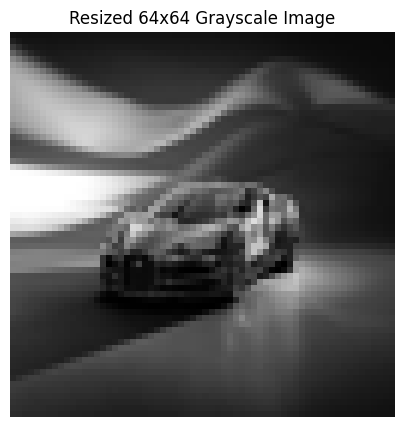

In [15]:
# Resize to a fixed 64x64 shape for machine learning use
resized_image = original_image.resize((64, 64)).convert("L")
resized_array = np.array(resized_image)
flattened_64 = resized_array.flatten()

print("\n--- Resized 64x64 Flattened Vector ---")
print(f"Shape: {flattened_64.shape}")
print("First 20 Pixel Values:", flattened_64[:20].tolist())

# Display resized image
plt.imshow(resized_image, cmap="gray")
plt.title("Resized 64x64 Grayscale Image")
plt.axis("off")
plt.show()


In [16]:
# Save the flattened vectors to files
np.save("flattened_bugatti.npy", flattened)
np.save("flattened_bugatti_64x64.npy", flattened_64)

print("✅ Saved feature vectors as:")
print(" - flattened_bugatti.npy")
print(" - flattened_bugatti_64x64.npy")


✅ Saved feature vectors as:
 - flattened_bugatti.npy
 - flattened_bugatti_64x64.npy
